
# Project: Investigate TMDB-MOVIES Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Watching movies is a very popular form of entertainment. After more than a hundred years of film evolution, there are different kinds of movies in the world. Some of them usually get high ratings from audience. Some of them do not. But __1. which genres are most popular from year to year?__ And __2. what kinds of properties are associated with movies that have high revenues?__ This project will focus on those two problems by using data analysis skills.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
# calculate the number of null data for each variable
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [5]:
# check for duplicates in the data
sum(df.duplicated())

1

In [6]:
# general statistics
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


__Findings:__

1. There are lots of missing values in column 'imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'genres', 'production_companies' which need to be fixed later.

2. There are lots of '|' symbols in column 'cast','director','keywords','genres','production_companies'. They will be seperated in the following data cleaning process. 

3. There is one duplicated data in the dataframe. It will be droped in the data cleaning process.

4. According to the problems we set, there are several columns that are  irrelavant to the question. Therefore, we can delete them in Data Cleaning part.


### Data Cleaning 

In [7]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

In [8]:
# first, we drop the irrelevant columns
df = df.drop(['imdb_id', 'director', 'homepage','tagline','keywords','overview','production_companies'], axis=1)

In [9]:
# delete null values
df.dropna(inplace=True)

In [10]:
#  removing rows where revenue_adj and budget_adj is equal to zero
df = df[df.budget_adj != 0]
df = df[df.revenue_adj != 0]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3851 entries, 0 to 10848
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3851 non-null   int64  
 1   popularity      3851 non-null   float64
 2   budget          3851 non-null   int64  
 3   revenue         3851 non-null   int64  
 4   original_title  3851 non-null   object 
 5   cast            3851 non-null   object 
 6   runtime         3851 non-null   int64  
 7   genres          3851 non-null   object 
 8   release_date    3851 non-null   object 
 9   vote_count      3851 non-null   int64  
 10  vote_average    3851 non-null   float64
 11  release_year    3851 non-null   int64  
 12  budget_adj      3851 non-null   float64
 13  revenue_adj     3851 non-null   float64
dtypes: float64(4), int64(6), object(4)
memory usage: 451.3+ KB


In [12]:
df.isnull().sum().any()

False

In [13]:
# seperate column 'genres' which contains '|'
df_genresnew = (df['genres'].str.split('|', expand=True).rename(columns=lambda x: f"genres_{x+1}"))

# check the result
df_genresnew.head()

,genres_1,genres_2,genres_3,genres_4,genres_5
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None


In [14]:
# join the seperated new column into the dataframe
df = df.join([df_genresnew])

In [15]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [16]:
sum(df.duplicated())

0

In [17]:
df.head()

,id,popularity,budget,revenue,original_title,cast,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres_1,genres_2,genres_3,genres_4,genres_5
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction,Thriller,None
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure,Science Fiction,Thriller,None
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Science Fiction,Thriller,None,None
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,Adventure,Science Fiction,Fantasy,None
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,Crime,Thriller,None,None


After cleaning data, we can start to explore our dataset.

<a id='eda'></a>
## Exploratory Data Analysis


### Which genres are most popular from year to year?

In [18]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

# Select all genres columns from the dataframe and add the related relearse_year
df_genres = df[['genres_1','genres_2', 'genres_3','genres_4', 'genres_5', 'release_year']]
df_genres.head()

,genres_1,genres_2,genres_3,genres_4,genres_5,release_year
0,Action,Adventure,Science Fiction,Thriller,None,2015
1,Action,Adventure,Science Fiction,Thriller,None,2015
2,Adventure,Science Fiction,Thriller,None,None,2015
3,Action,Adventure,Science Fiction,Fantasy,None,2015
4,Action,Crime,Thriller,None,None,2015


In [19]:
# Find all years of those movies
year = df_genres['release_year']
year = year.drop_duplicates()
year_set = []
for i in year:
    if i not in year_set:
        year_set.append(i)

year_set.sort()
len(year_set)

56

In [20]:
df_genres1 = df_genres.drop(['release_year'], axis=1)
genres_set1 = df_genres1.stack()
genres_list = list(genres_set1.values)
genresset = set(genres_list)
genres_set = sorted(list(genresset))
genres_set

['Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western']

In [21]:
# calculate the frequency of each genre in each year
max_num = []
for i in year_set:
    num = []
    for j in genres_set:
        num.append(len(df_genres[(df_genres.genres_1 == j) & (df_genres.release_year == i )]) + len(df_genres[(df_genres.genres_2 == j) & (df_genres.release_year == i )]) + len(df_genres[(df_genres.genres_3 == j) & (df_genres.release_year == i )]) + len(df_genres[(df_genres.genres_4 == j) & (df_genres.release_year == i )]) + len(df_genres[(df_genres.genres_5 == j) & (df_genres.release_year == i )]))
    max_num.append(num)
print(max_num)

[[2, 1, 0, 2, 0, 0, 3, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 1, 0, 1], [2, 2, 1, 4, 1, 0, 6, 2, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1], [2, 3, 0, 0, 1, 0, 5, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 2], [2, 2, 0, 1, 0, 0, 3, 0, 0, 0, 3, 1, 0, 1, 2, 0, 0, 3, 1, 0], [1, 1, 0, 3, 1, 0, 4, 2, 1, 0, 0, 0, 3, 1, 2, 0, 0, 2, 1, 0], [2, 2, 0, 1, 0, 0, 3, 1, 0, 0, 1, 0, 1, 0, 2, 0, 0, 1, 1, 0], [2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1], [3, 5, 1, 5, 4, 0, 7, 2, 1, 0, 0, 0, 2, 1, 4, 0, 0, 3, 1, 0], [2, 3, 0, 0, 1, 0, 6, 1, 0, 0, 1, 1, 1, 3, 1, 3, 0, 1, 2, 1], [1, 2, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2], [4, 4, 1, 5, 1, 0, 7, 1, 0, 0, 2, 0, 0, 2, 3, 1, 0, 1, 3, 2], [6, 2, 0, 0, 5, 0, 7, 1, 1, 0, 0, 0, 1, 2, 2, 4, 0, 8, 0, 0], [3, 2, 0, 2, 3, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 3, 0, 0], [4, 1, 1, 3, 6, 0, 7, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 3, 0, 0], [6, 2, 0, 2, 5, 0, 8, 0, 0, 0, 0, 1, 0, 2, 1, 1, 0, 7, 0, 1], [0, 2, 0, 3, 1, 0, 5, 0, 1, 0, 0, 2, 2, 0, 1, 1, 0, 2, 1, 0], [3, 2, 

In [22]:
# create a dataframe containing all the information we got for now.
df_genres_new = pd.DataFrame(max_num, columns=genres_set)
df_genres_new.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,2,1,0,2,0,0,3,0,0,0,1,1,0,0,2,0,0,1,0,1
1,2,2,1,4,1,0,6,2,0,0,1,1,1,0,1,0,0,0,1,1
2,2,3,0,0,1,0,5,0,0,0,1,0,0,0,0,0,0,1,1,2
3,2,2,0,1,0,0,3,0,0,0,3,1,0,1,2,0,0,3,1,0
4,1,1,0,3,1,0,4,2,1,0,0,0,3,1,2,0,0,2,1,0


In [23]:
# find the maximum number among all genres in each year
df_genres_new['max'] = list(df_genres_new.max(axis=1))
df_genres_new.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,max
0,2,1,0,2,0,0,3,0,0,0,...,1,0,0,2,0,0,1,0,1,3
1,2,2,1,4,1,0,6,2,0,0,...,1,1,0,1,0,0,0,1,1,6
2,2,3,0,0,1,0,5,0,0,0,...,0,0,0,0,0,0,1,1,2,5
3,2,2,0,1,0,0,3,0,0,0,...,1,0,1,2,0,0,3,1,0,3
4,1,1,0,3,1,0,4,2,1,0,...,0,3,1,2,0,0,2,1,0,4


In [24]:
# identify the genre which is the most popular one year by year
df_genres_new['pop_genres'] = df_genres_new.loc[:,'Action':'Western'].isin(df_genres_new['max']).idxmax(1)
df_genres_new.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,...,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,max,pop_genres
0,2,1,0,2,0,0,3,0,0,0,...,0,0,2,0,0,1,0,1,3,Drama
1,2,2,1,4,1,0,6,2,0,0,...,1,0,1,0,0,0,1,1,6,Drama
2,2,3,0,0,1,0,5,0,0,0,...,0,0,0,0,0,1,1,2,5,Drama
3,2,2,0,1,0,0,3,0,0,0,...,0,1,2,0,0,3,1,0,3,Drama
4,1,1,0,3,1,0,4,2,1,0,...,3,1,2,0,0,2,1,0,4,Drama


In [25]:
# add the related release year
df_genres_new['year'] = year_set
df_genres_new.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,...,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,max,pop_genres,year
0,2,1,0,2,0,0,3,0,0,0,...,0,2,0,0,1,0,1,3,Drama,1960
1,2,2,1,4,1,0,6,2,0,0,...,0,1,0,0,0,1,1,6,Drama,1961
2,2,3,0,0,1,0,5,0,0,0,...,0,0,0,0,1,1,2,5,Drama,1962
3,2,2,0,1,0,0,3,0,0,0,...,1,2,0,0,3,1,0,3,Drama,1963
4,1,1,0,3,1,0,4,2,1,0,...,1,2,0,0,2,1,0,4,Drama,1964


This table shows which movie genre is the most popular one from year to year.

In [26]:
df_plot = df_genres_new.loc[:,'Action':'Western']
df_plot.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,2,1,0,2,0,0,3,0,0,0,1,1,0,0,2,0,0,1,0,1
1,2,2,1,4,1,0,6,2,0,0,1,1,1,0,1,0,0,0,1,1
2,2,3,0,0,1,0,5,0,0,0,1,0,0,0,0,0,0,1,1,2
3,2,2,0,1,0,0,3,0,0,0,3,1,0,1,2,0,0,3,1,0
4,1,1,0,3,1,0,4,2,1,0,0,0,3,1,2,0,0,2,1,0


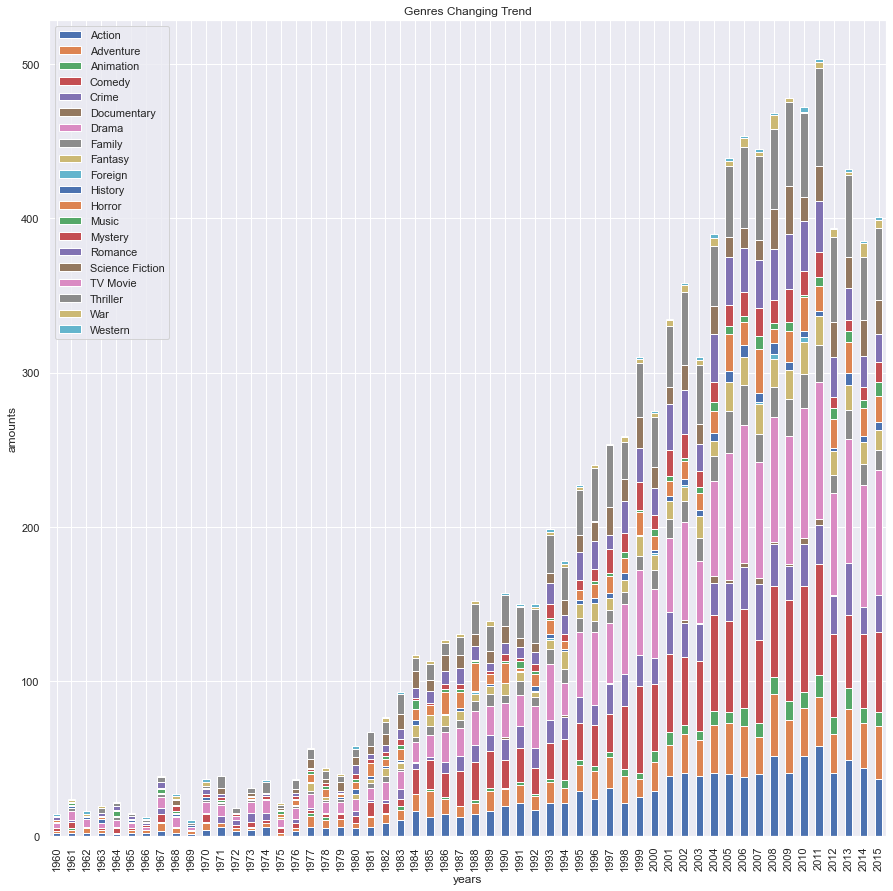

In [27]:
# plot stacked histogram showing the trend of genres
sn.set(rc={'figure.figsize':(15,15)})
hist = df_plot.plot.bar(stacked=True)

plt.title('Genres Changing Trend')
plt.xlabel('years')
plt.ylabel('amounts')

bars = df_genres_new['year']
x_pos = np.arange(len(bars))
plt.xticks(x_pos, bars)
 
plt.show()

From the plot above, we can see that 'Drama' is the most increasing genre. It means that this genre is the most popular one for recent years. For observing the most genres of each year, we can judge it by the area of each colorful bars. For example, in 2015, we can see 'Drama' is the most popular genre since the pink area is the largest. 

### What kinds of properties are associated with movies that have high revenues?


In [28]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

# analyze the correlation between each two variables
corrMatrix = df.corr()
print (corrMatrix)

                    id  popularity    budget   revenue   runtime  vote_count  \
id            1.000000    0.189090 -0.027353 -0.003186 -0.035376    0.111600   
popularity    0.189090    1.000000  0.446643  0.615385  0.214956    0.780008   
budget       -0.027353    0.446643  1.000000  0.688433  0.260857    0.556731   
revenue      -0.003186    0.615385  0.688433  1.000000  0.250248    0.754486   
runtime      -0.035376    0.214956  0.260857  0.250248  1.000000    0.273696   
vote_count    0.111600    0.780008  0.556731  0.754486  0.273696    1.000000   
vote_average -0.000677    0.317806  0.023730  0.227122  0.352119    0.387305   
release_year  0.489855    0.173470  0.268308  0.139219 -0.112537    0.207352   
budget_adj   -0.123988    0.398945  0.958491  0.657430  0.333905    0.497719   
revenue_adj  -0.088285    0.546764  0.533274  0.900848  0.280457    0.654565   

              vote_average  release_year  budget_adj  revenue_adj  
id               -0.000677      0.489855   -0.12398

For this table, we only consider 'budget_adj' and 'revenue_adj' since they show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

As we can see from the above correlation statistics, 'budget_adj', 'vote_count' and 'popularity' has the strong positive correlation with 'revenue_adj'. It means that, if some movies have high values of 'budget_adj', 'vote_count' or 'popularity', they likely have high revenues.

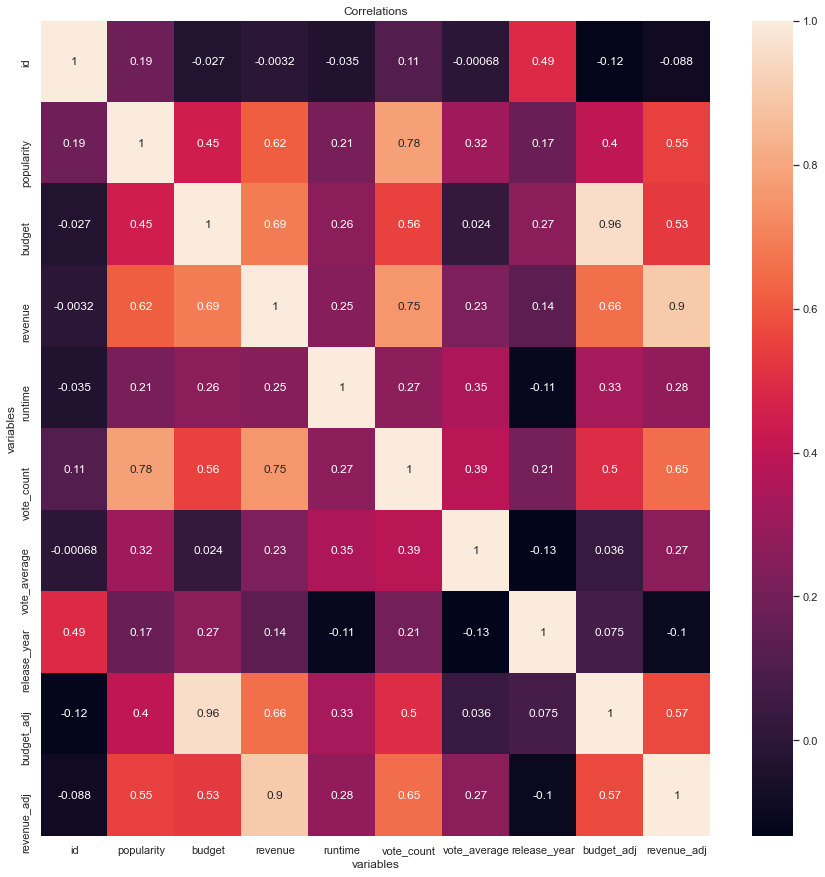

In [29]:
sn.heatmap(corrMatrix, annot=True)

plt.title('Correlations')
plt.xlabel('variables')
plt.ylabel('variables')

plt.show()

From this plot, we can tell the correlation from the color and the shade. If the color is closer to black, the correlation tends to be strong negative. If the color is closer to white, the correlation tends to be strong positive. 

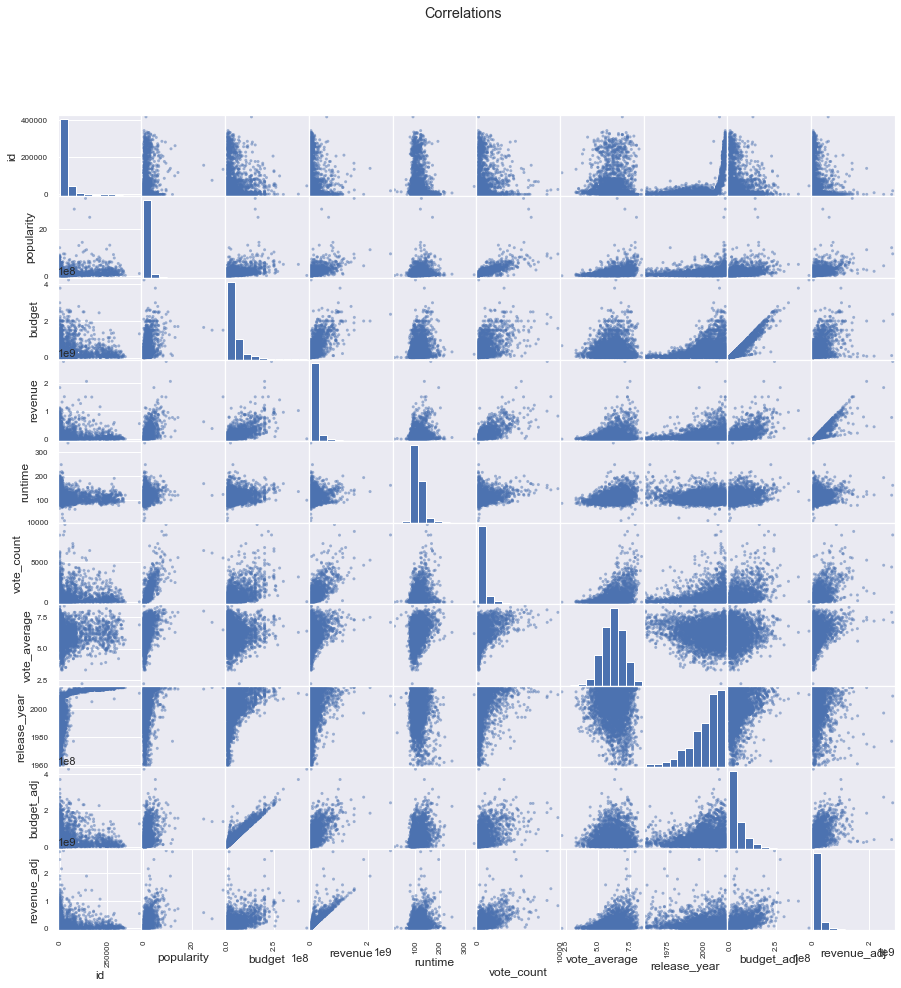

In [30]:
pd.plotting.scatter_matrix(df,figsize=(15,15))
plt.suptitle('Correlations')

plt.show()

From the above correlation matrix, we can get the correlation by observing the pattern for each scatter plot. If the pattern tends to linear, it means that these two variables have strong correlation. If the pattern can not give any specific pattern,  those two variables probably have no correlation. 

<a id='conclusions'></a>
## Conclusions


This dataset contained lots of informations. However, there were some null values and zero values to be fixed. And variable containing symbol '|' needed to be seperated. After cleaning the data, we analyzed the data and answered those two questions by creating a new dataframe and ploting. We created a dataframe containing the statistics for the amount of each genres year by year. After finding the maximum for each year, we got the most popular genres year by year. About finding the properties which associated with revenue, we builted the correlation matrix and plotted the graph to see correlations of each two variables. As the result,  'budget_adj', 'vote_count' and 'popularity' has the strong positive correlation with 'revenue_adj'. 

__Limitation:__
Due to deal with missing data and zero values, we can not be sure that the rest data can be used to get the correct answer. For example, when we want to get the most popular genre for each year, we can not make sure that genre is the most popular one before deleting missing data and zeros. Secondly, we can not make sure this dataset is the most complete one or up-tp-date one. Moreover, the volume of this dataset is not large enough for representing the overall situation of each year.